# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load Dataset

In [5]:
data = pd.read_csv("advertising.csv")
print("\n Data loaded successfully!")


 Data loaded successfully!


In [6]:
print("\n Data Overview:")
print(data.head(), "\n")
print("Shape:", data.shape)
print("\nMissing Values:\n", data.isnull().sum())


 Data Overview:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9 

Shape: (200, 4)

Missing Values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


# Exploratory Data Analysis

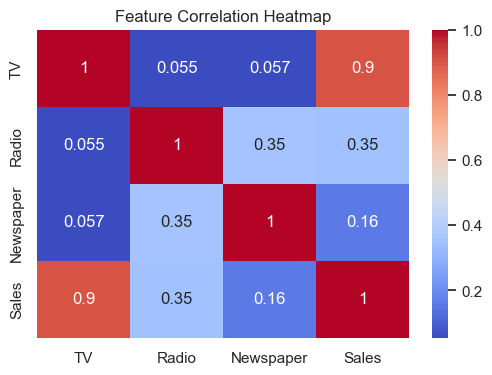

In [7]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

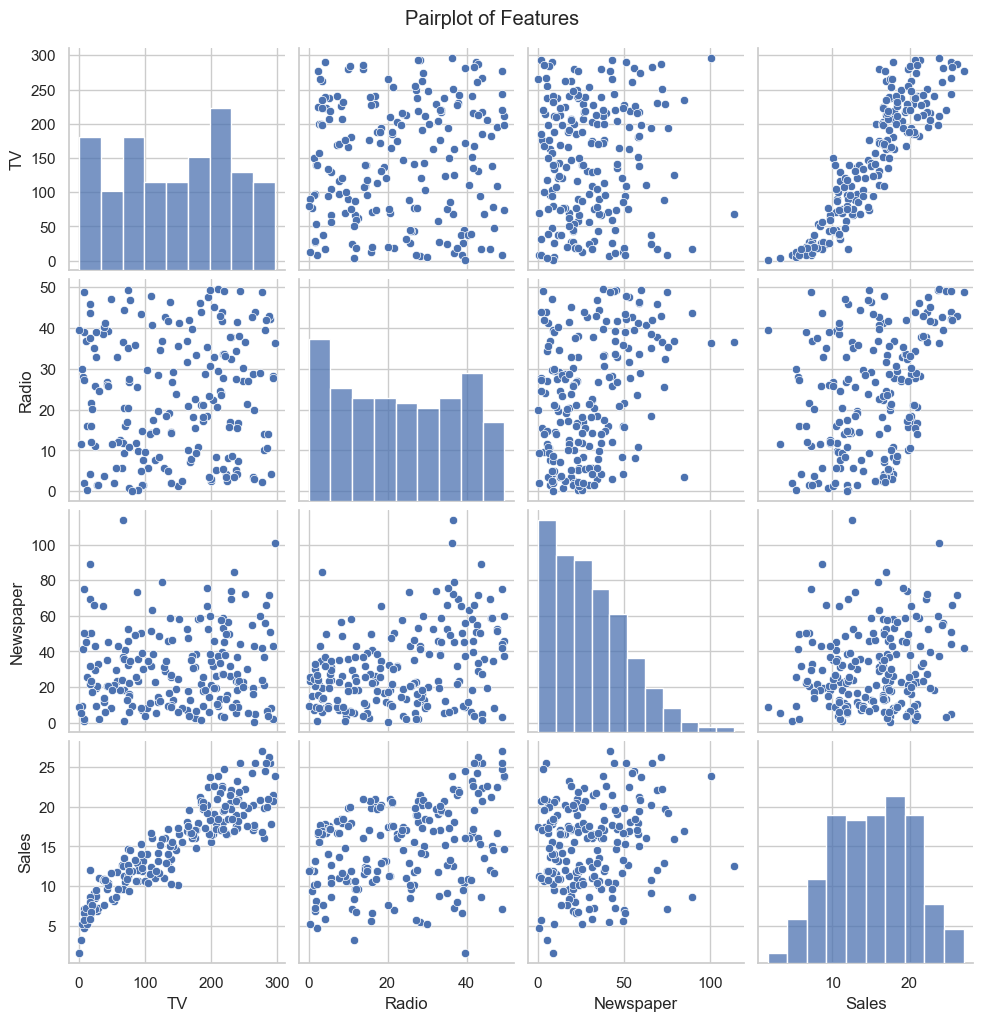

In [8]:
sns.pairplot(data)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# Feature Selection

In [9]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest + Grid Search

In [12]:
params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10]
}

In [13]:
print("\n Tuning Random Forest...")
grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=params,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train_scaled, y_train)

best_model = grid.best_estimator_
print("\nBest Parameters:", grid.best_params_)


 Tuning Random Forest...
Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


# Evaluation

In [14]:
y_pred = best_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [15]:
print(f"\n Model Performance:")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


 Model Performance:
R² Score: 0.954
MAE: 0.917
RMSE: 1.199


# Save Model & Scaler

In [16]:
with open("sales_prediction_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("\n Model and Scaler saved successfully!")



 Model and Scaler saved successfully!
